# MLP Project

> by Nagavengadeshwaran S 

## Project Checklist
- [X] *The dataset is appropriately loaded and stored into corresponding variables.*
- [X] *Exploratory data analysis*
    - [X] *Visualizing key statistics and relationships in the data*
    - [X] *Correctly identify the feature types.*
- [X] *Detecting missing data and imputation, if required.*
- [X] *The dataset is appropriately preprocessed,*
    - [X] *scaling numerical features.*
    - [X] *encoding categorical features.*
- [X] *Appropriate usage of pipelines if any.*
- [X] *Feature engineering/extraction.*
- [X] *Hyperparameter tuning  of the model to optimize its performance.*
- [X] *Code should be clean, well-structured and appropriately commented.*
- [X] *Highlight important ideas learnt from the dataset and/or model.*
- [X] Compare at least 3 best models of all the models experimented, analyze their results and provide insights on the model's performance.
- [X] Make submission with the model with the best score on training data.

In [1]:
'''
Constants
'''

RANDOM_SEED=42
FIGSIZE=(17,11)
DEV_ENV=False

In [2]:
'''
Common Imports
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
'''
Common settings
'''

np.random.seed(RANDOM_SEED)

# Data loading

In [4]:
'''
CSV Files
'''

training_csv = "/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv"
test_csv = "/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv"

In [5]:
'''
Training data loading
'''

data = pd.read_csv(training_csv)

# Exploratory data analysis (EDA) and data statistics

## Basic statistics


In [6]:
data.head().T

,0,1,2,3,4
VendorID,1,0,1,0,1
tpep_pickup_datetime,2023-06-28 17:20:21,2023-06-29 23:05:01,2023-06-30 10:19:31,2023-06-29 13:23:09,2023-06-29 22:03:32
tpep_dropoff_datetime,2023-06-28 16:34:45,2023-06-29 22:01:35,2023-06-30 11:13:10,2023-06-29 14:20:01,2023-06-29 22:22:22
passenger_count,1.0,1.0,1.0,1.0,3.0
trip_distance,2.14,2.7,1.15,0.4,1.1
RatecodeID,1.0,1.0,1.0,1.0,1.0
store_and_fwd_flag,N,N,N,N,N
PULocationID,120,15,167,128,203
DOLocationID,9,215,223,239,52
payment_type,Credit Card,Credit Card,Credit Card,Credit Card,Credit Card


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

### Observation

There are 3 types of data types which need preprocessing:

- Text categorical
    - `payment_type`
    - `store_and_fwd_flag`
- Numerical categorical
    - `PULocationID`
    - `DOLocationID`
    - `VendorID`
    - `passenger_count`
    - `RatecodeID`
- Numerical continuous
    - `trip_distance`
    - `extra`
    - `tip_amount`
    - `tolls_amount`
    - `improvement_surcharge`
    - `congestion_surcharge`
    - `Airport_fee`

There is an indication of missing values in the following columns

- `store_and_fwd_flag`
- `passenger_count`
- `RatecodeID`
- `congestion_surcharge`
- `Airport_fee`

Based on their data types listed above, they can be imputed according to the appropriate strategy

Furthermore, columns `tpep_pickup_datetime` and `tpep_dropoff_datetime` can be converted and used to create a new column which calculates the "duration" of the trip which can effectively be correlated to the target variable.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,175000.0,0.728377,0.445606,0.000000,0.000000,1.000000,1.000000,2.000000
passenger_count,168923.0,1.357678,0.891283,0.000000,1.000000,1.000000,1.000000,9.000000
trip_distance,175000.0,5.145930,394.971052,0.000000,1.080000,1.840000,3.610000,135182.060000
RatecodeID,168923.0,1.518307,6.514678,1.000000,1.000000,1.000000,1.000000,99.000000
PULocationID,175000.0,132.710349,76.148799,1.000000,67.000000,133.000000,199.000000,264.000000
DOLocationID,175000.0,132.701429,76.192493,1.000000,67.000000,133.000000,199.000000,264.000000
extra,175000.0,1.932143,1.948497,-7.500000,0.000000,1.000000,2.500000,11.750000
tip_amount,175000.0,6.127497,4.610834,0.000079,3.473321,5.286217,7.502746,484.876151
tolls_amount,175000.0,0.646816,2.328274,-29.300000,0.000000,0.000000,0.000000,80.000000
improvement_surcharge,175000.0,0.979689,0.198775,-1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
'''
Show unique values of each column
'''

def show_column_values():
    for column_name in data.columns:
        if column_name in ['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']:
            continue
        
        print('-'*30)
        print(data[column_name].value_counts())
        print('-'*30)

show_column_values()

------------------------------
VendorID
1    127340
0     47597
2        63
Name: count, dtype: int64
------------------------------
------------------------------
passenger_count
1.0    128534
2.0     24316
3.0      6018
4.0      3668
0.0      2818
5.0      1970
6.0      1596
8.0         2
9.0         1
Name: count, dtype: int64
------------------------------
------------------------------
trip_distance
0.00     2632
1.00     2431
0.90     2383
1.20     2363
1.10     2297
         ... 
31.42       1
26.80       1
27.53       1
13.29       1
15.17       1
Name: count, Length: 2929, dtype: int64
------------------------------
------------------------------
RatecodeID
1.0     158652
2.0       7314
5.0       1036
99.0       748
3.0        727
4.0        446
Name: count, dtype: int64
------------------------------
------------------------------
store_and_fwd_flag
N    167729
Y      1194
Name: count, dtype: int64
------------------------------
------------------------------
PULocationID
264

### Observation

There are a lot of errors in recording data apart from missing values. For instance:

- Columns `extra`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, `congestion_surcharge`, `Airport_fee` have negative values, which shouldn't be there, as the purpose of the column is violated, which can further cause bias in the models which will be trained.
- Column `trip_distance` has the maximum value of 135182.060000, which is absurd, knowing that the circumference of the Earth is some 40k kms.
- Column `payment_type` has a separate value named "unknown", which is the same as a missing value.
- Column `passenger_count` has values as 0, which is irrational, assuming that every ride is supposed to have at least 1 passenger.

These deviations can be rectified during feature engineering and preprocessing. They should be kept in mind while doing so.

In [10]:
sorted(list(data['total_amount'].value_counts().index))[:20]

[-576.75,
 -441.0,
 -305.3,
 -273.25,
 -223.5,
 -156.65,
 -153.5,
 -141.88,
 -139.55,
 -129.3,
 -124.2,
 -117.55,
 -116.7,
 -112.3,
 -111.85,
 -109.75,
 -108.45,
 -107.21,
 -106.05,
 -103.8]

In [11]:
sorted(list(data['total_amount'].value_counts().index))[-20:-1]

[418.53,
 421.2,
 429.0,
 430.3,
 431.0,
 441.0,
 456.9,
 461.0,
 461.95,
 470.3,
 485.1,
 491.0,
 491.15,
 494.0,
 500.0,
 551.0,
 563.15,
 570.55,
 576.75]

In [12]:
'''
Correlation matrix
'''

cor_mat = data.corr(numeric_only=True)

In [13]:
'''
Correlation with total_amount (target variable)
'''

print(cor_mat['total_amount'])

VendorID                 0.039695
passenger_count          0.053224
trip_distance            0.009911
RatecodeID               0.055527
PULocationID             0.000715
DOLocationID            -0.002954
extra                    0.234346
tip_amount               0.638658
tolls_amount             0.684765
improvement_surcharge    0.224036
total_amount             1.000000
congestion_surcharge    -0.147765
Airport_fee              0.597829
Name: total_amount, dtype: float64


## Diagrams


In [14]:
'''
Utility function to print all diagrams based on data passed as parameter
'''

def print_diagrams(df, ignore_pairplots=True, masked_heatmap=False):
    
    '''
    Histograms
    '''
    plt.figure(figsize=FIGSIZE)
    df.hist(bins=40, figsize=FIGSIZE)
    plt.show()
    
    corr_mat = df.corr(numeric_only=True)
    
    if masked_heatmap:
        '''
        Heat map (masked)
        '''

        plt.figure(figsize=FIGSIZE)
        mask = np.triu(corr_mat)
        sns.heatmap(corr_mat, annot=True, mask=mask)
        plt.show()
    else:
        '''
        Heat map
        '''

        plt.figure(figsize=FIGSIZE)
        sns.heatmap(corr_mat, annot=True)
        plt.show()
    
    '''
    Pairplots (optional in this function)
    '''
    
    if not ignore_pairplots:
        attributes_list = list(cor_mat['total_amount'].index)
        attributes_list.remove('congestion_surcharge')

        pairplot_attributes = attributes_list.copy()[6:]
        pairplot_attributes

        plt.figure(figsize=FIGSIZE)
        sns.pairplot(data[pairplot_attributes])
        plt.show()
    
    '''
    Box plot & Violin plot of numerical data
    '''
    for col in data.columns:
        if (data[col].dtype != 'object'):
            figure , axis = plt.subplots(1, 2, figsize=FIGSIZE)
            sns.boxplot(data=data[col], orient="v", ax=axis[0])
            sns.violinplot(data=data[col], orient="v", scale="width", ax=axis[1])
            plt.suptitle(col, size="xx-large", weight="bold")
            plt.show()

<Figure size 1700x1100 with 0 Axes>

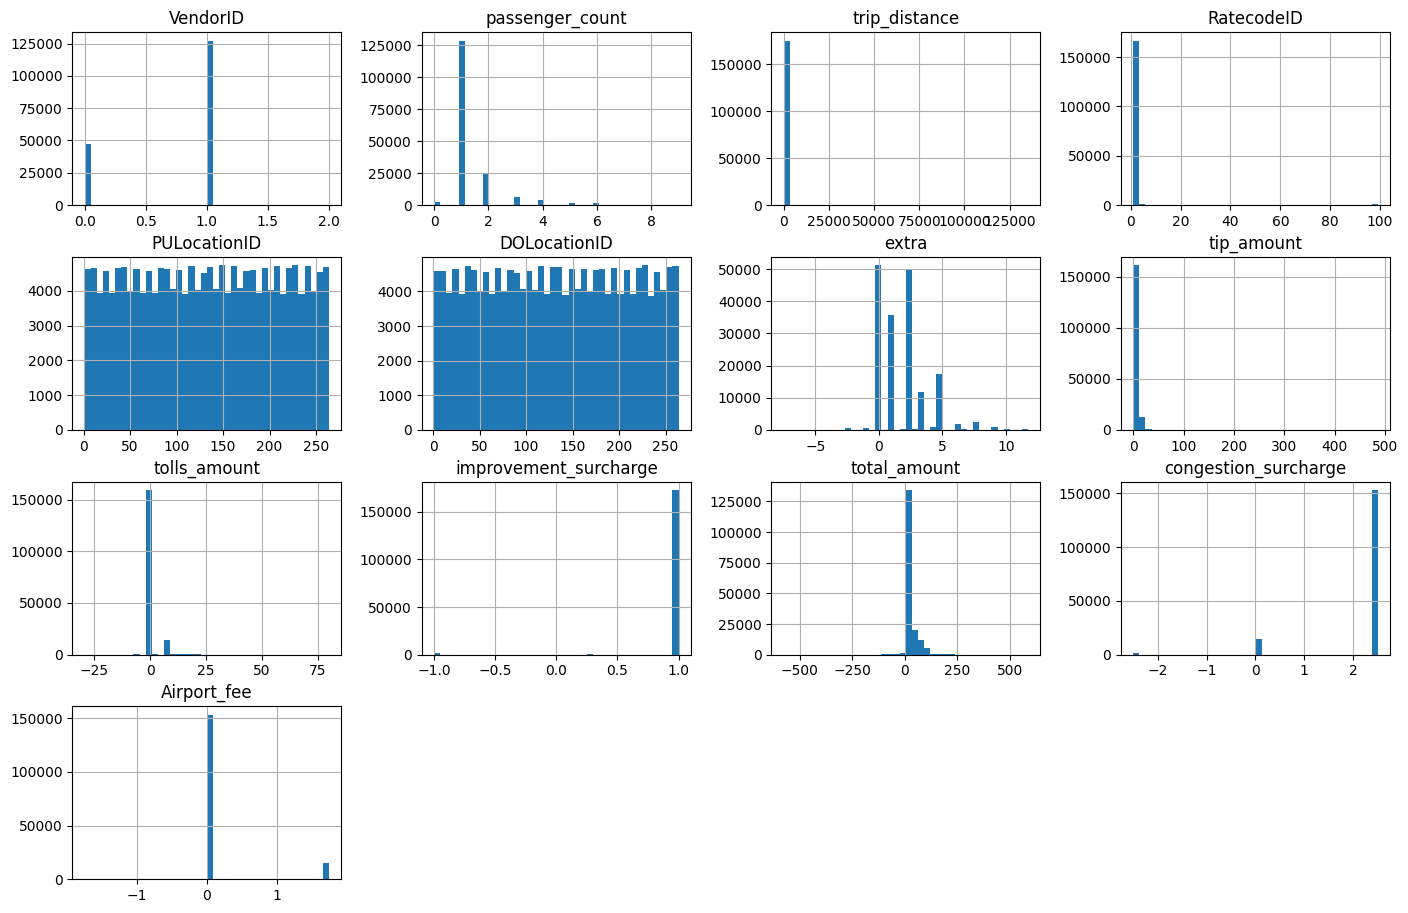

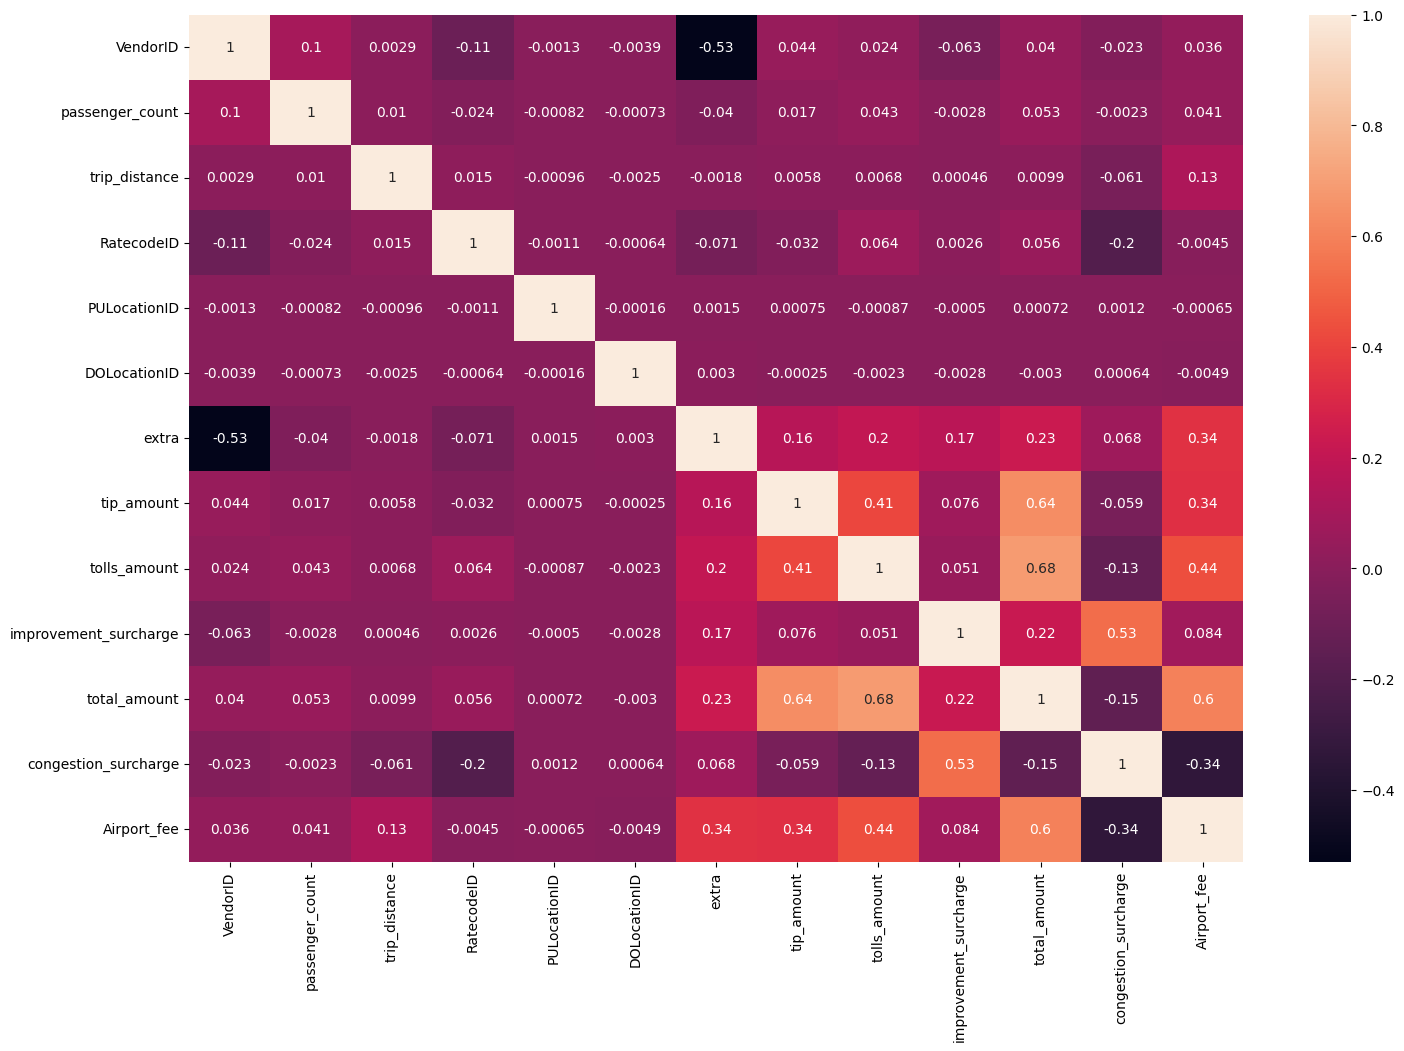

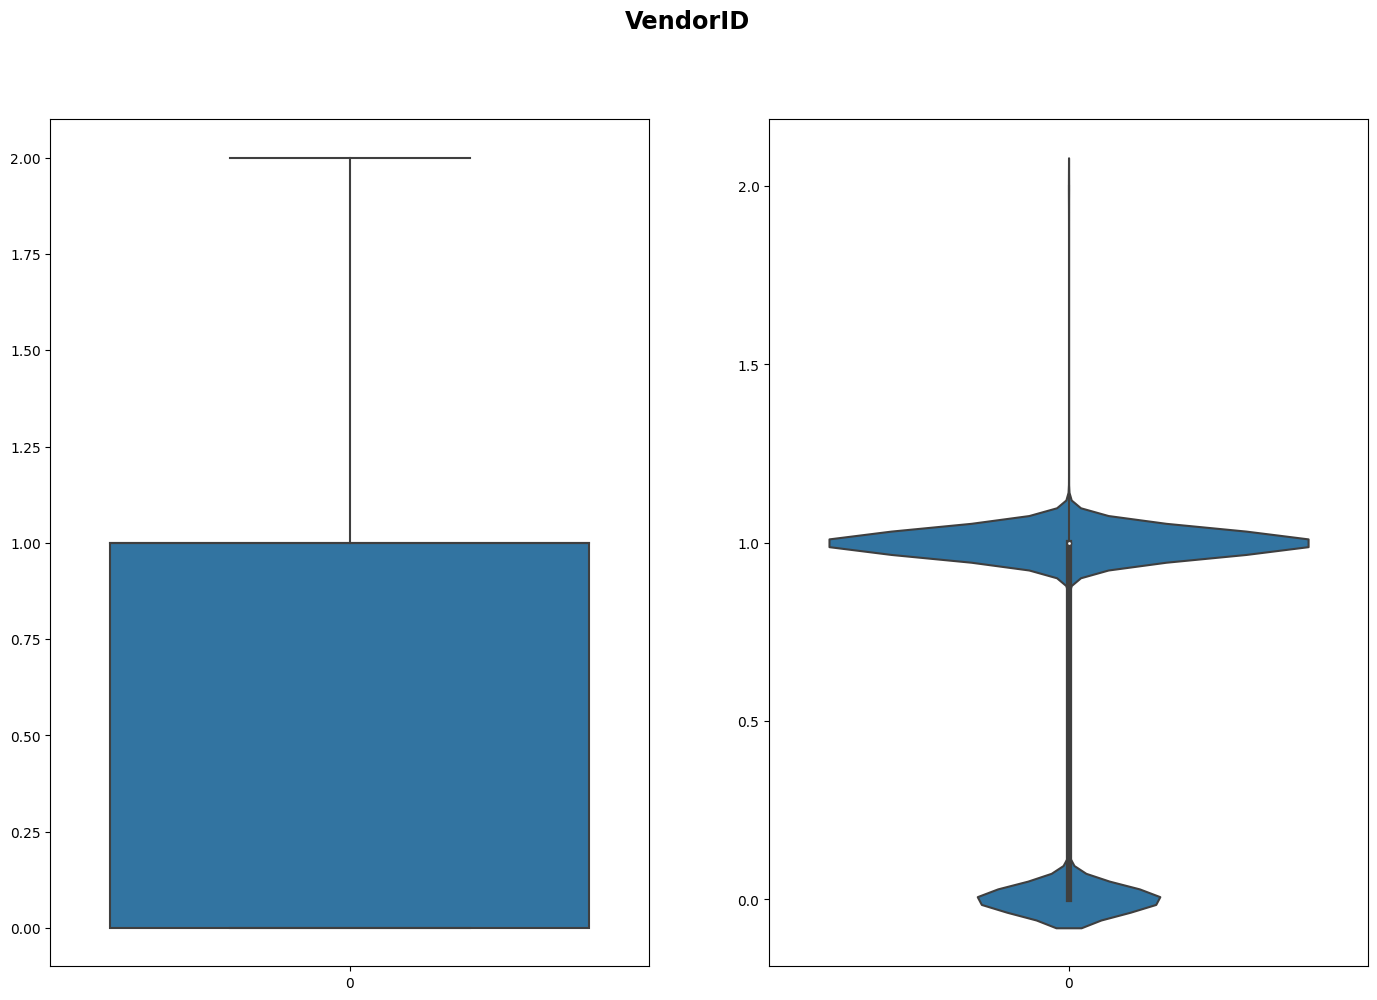

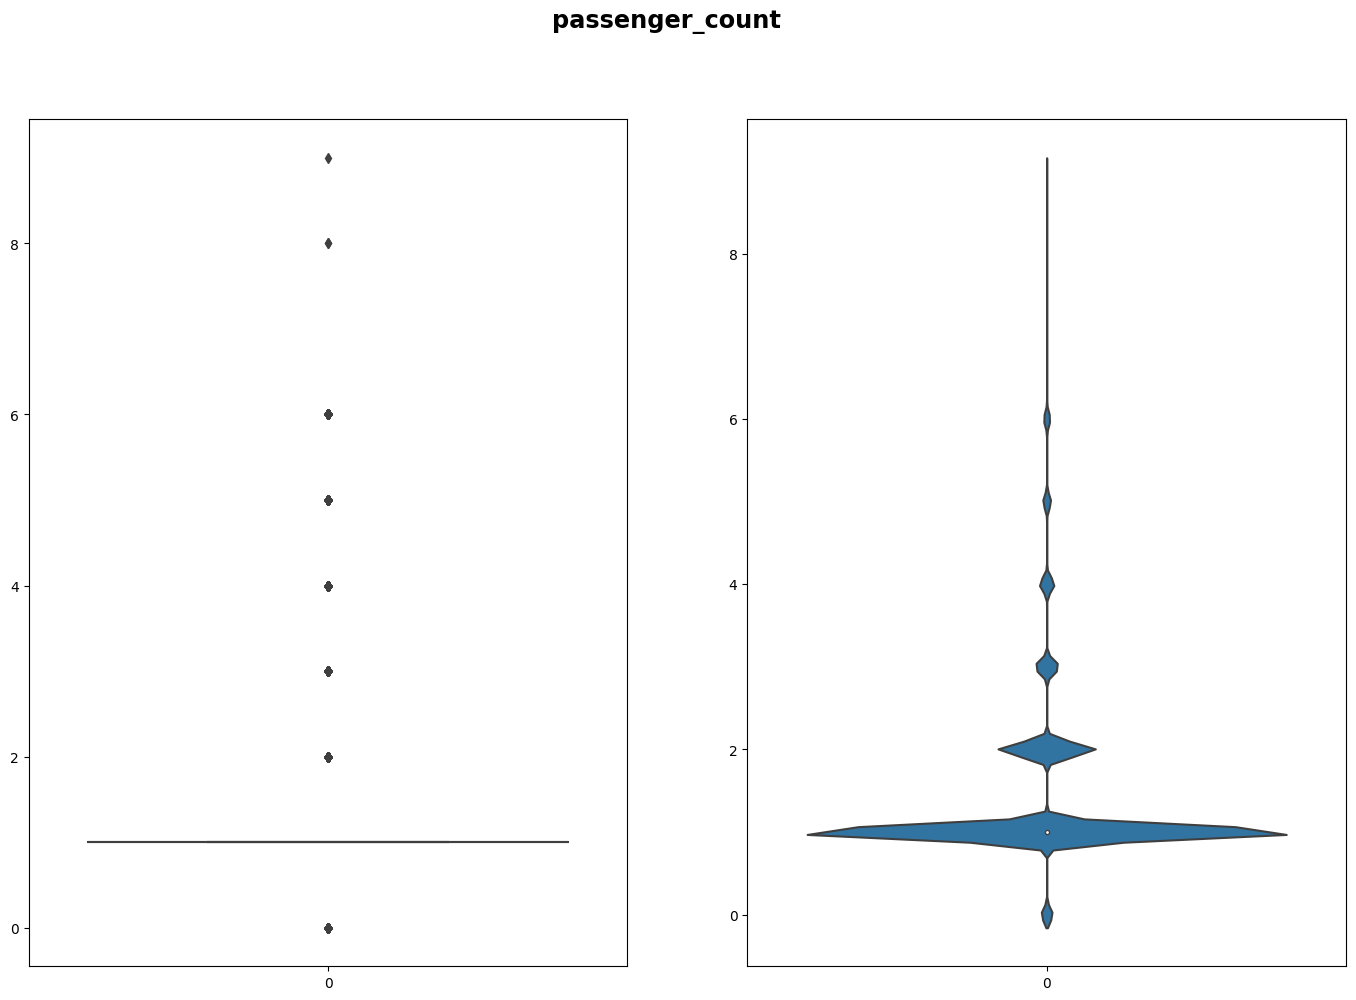

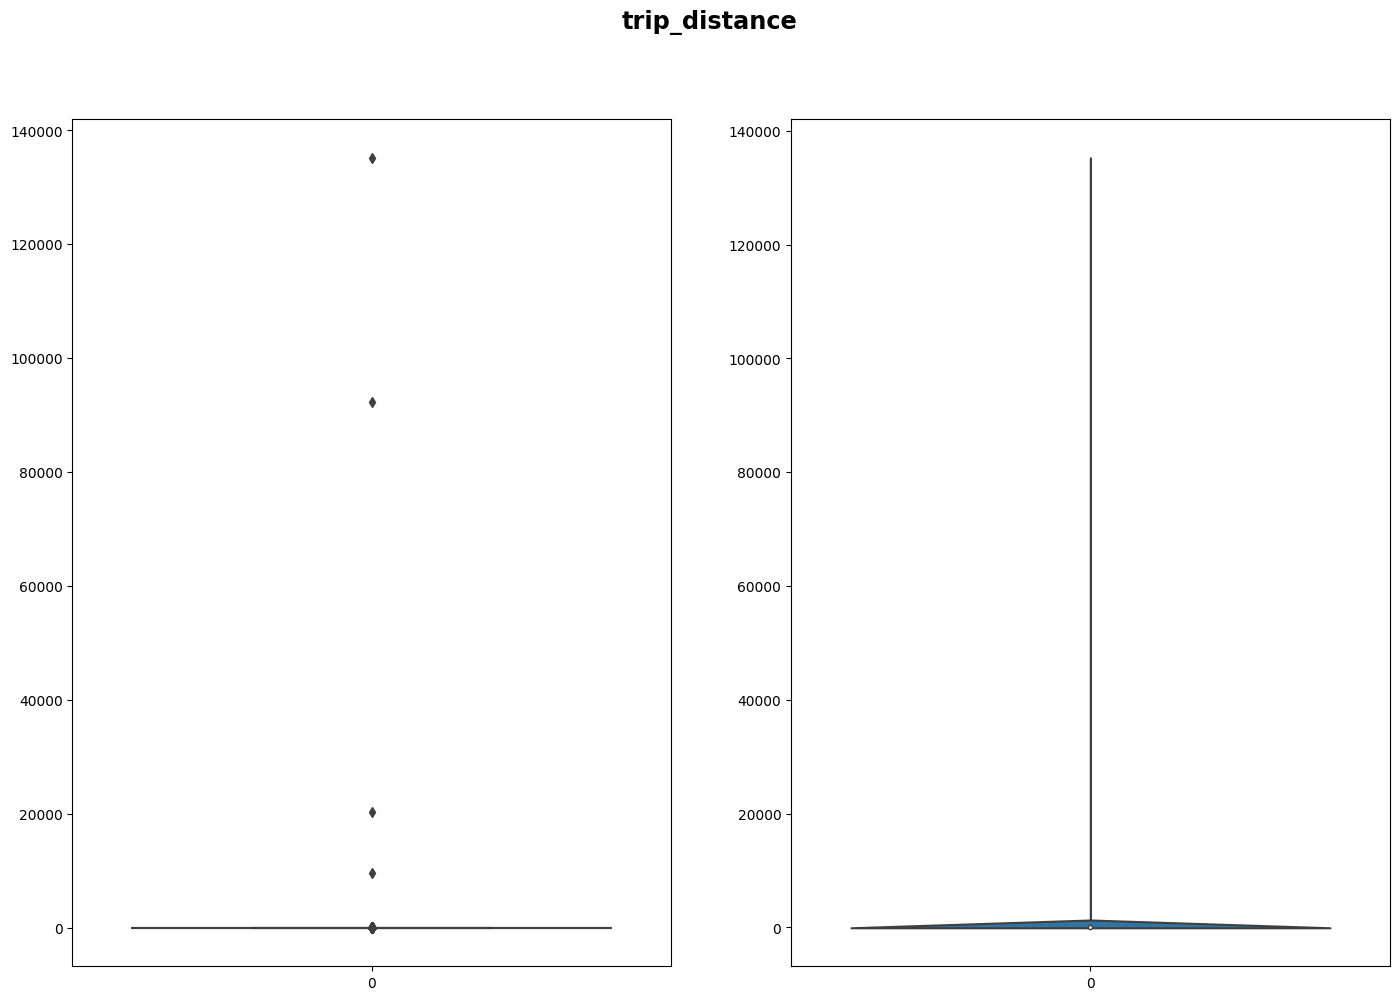

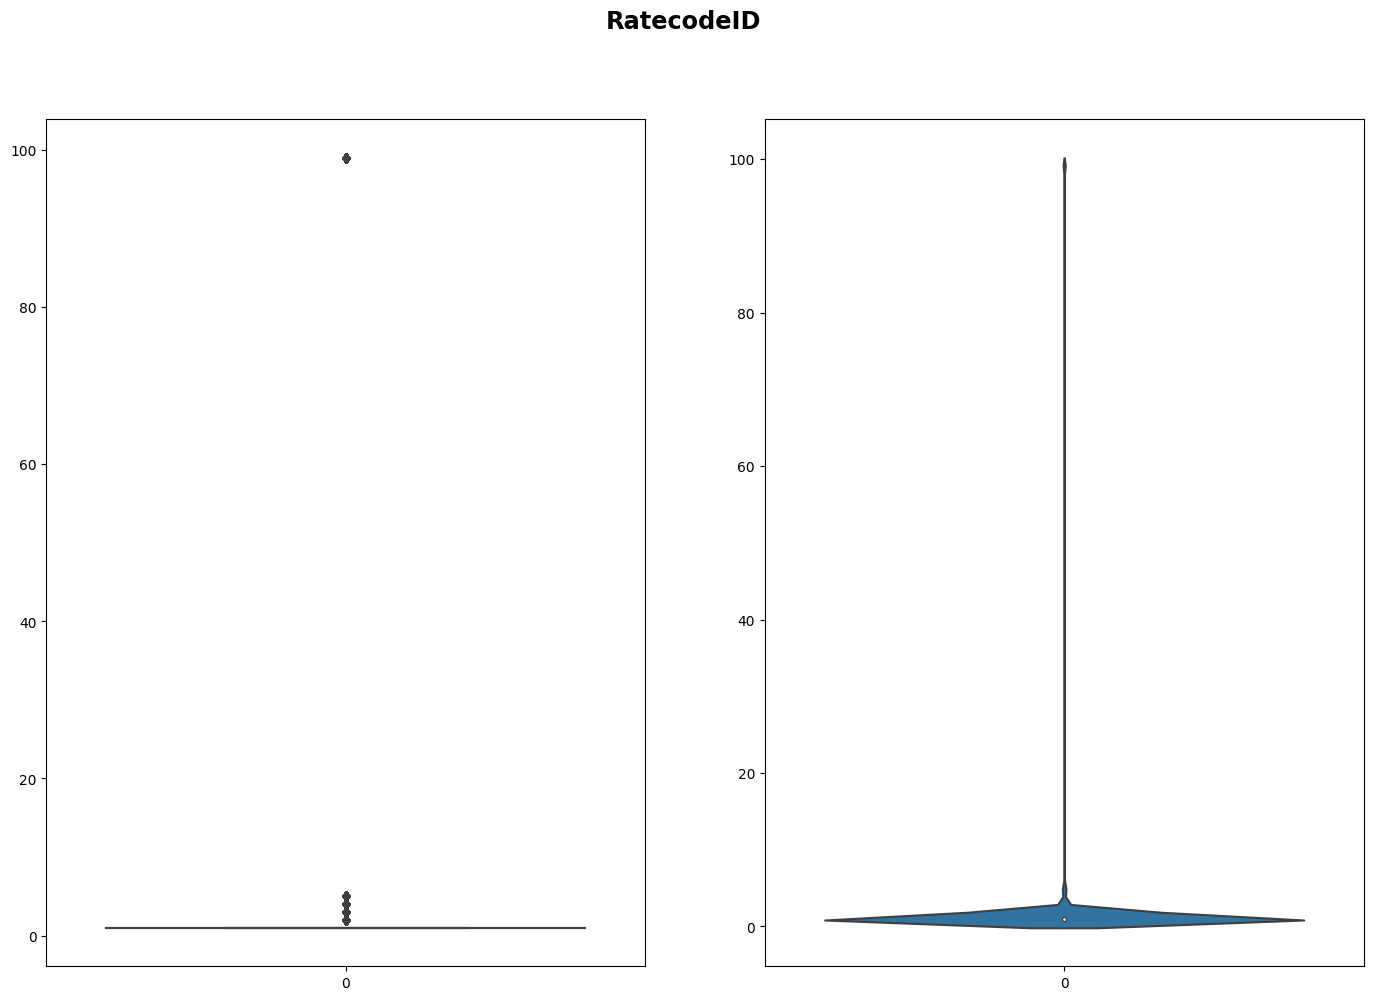

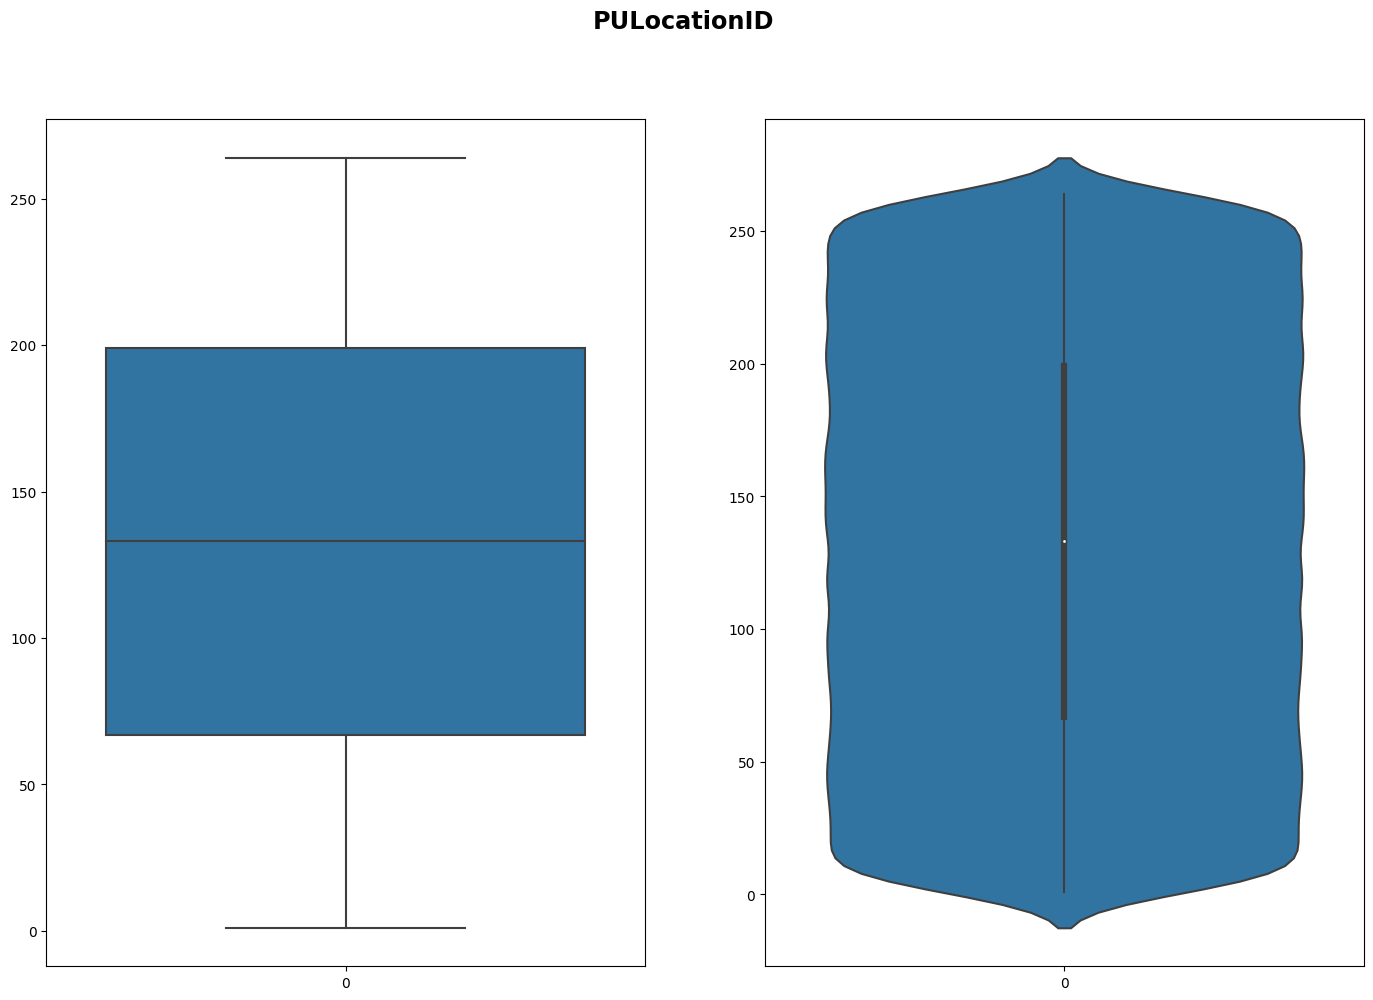

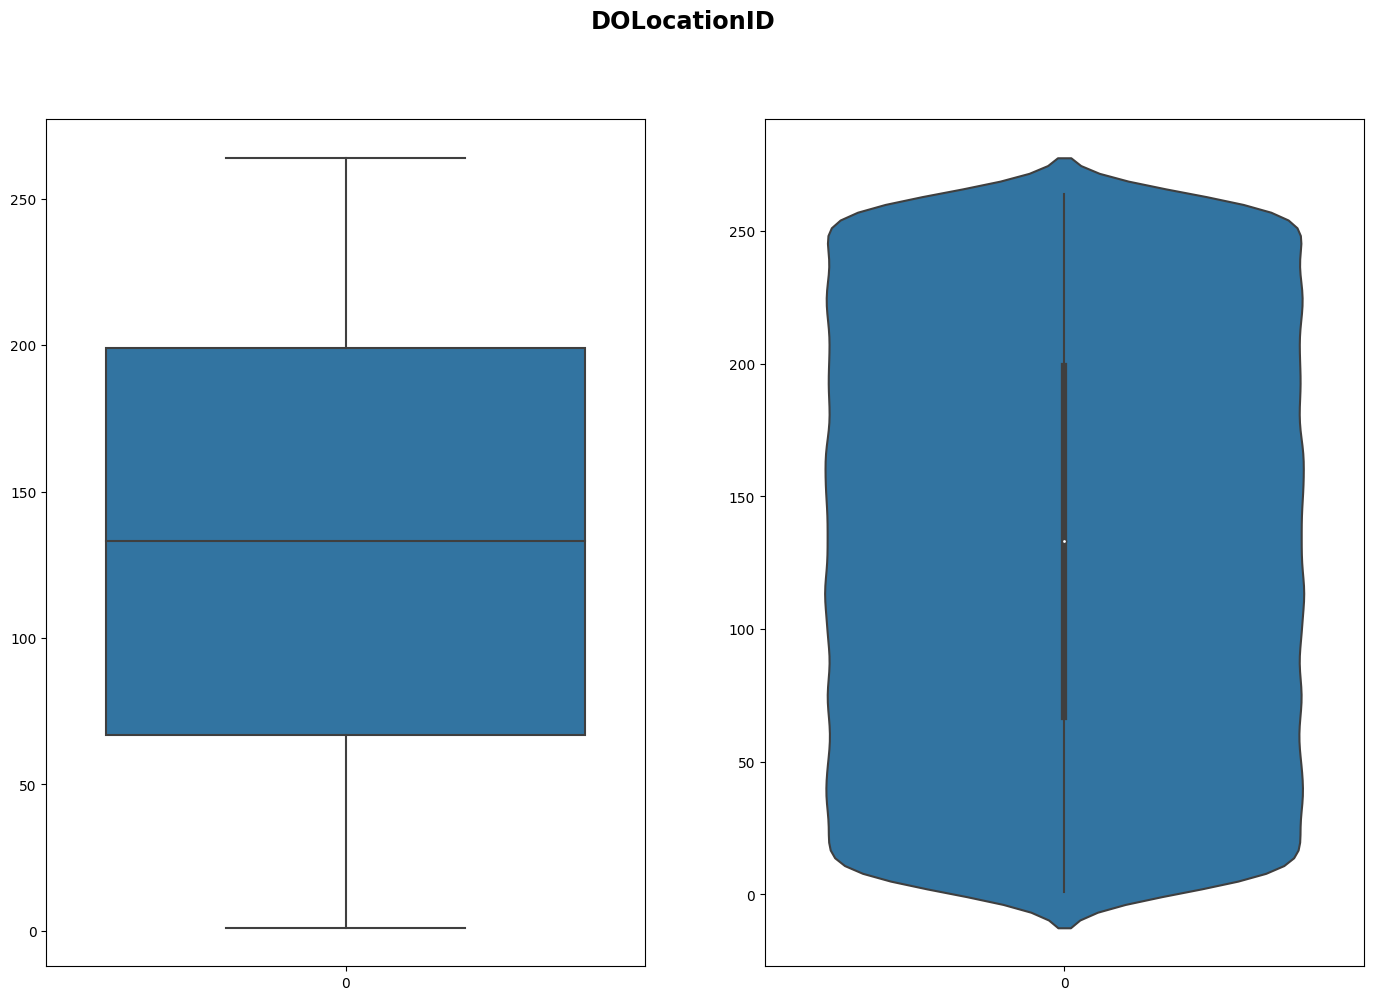

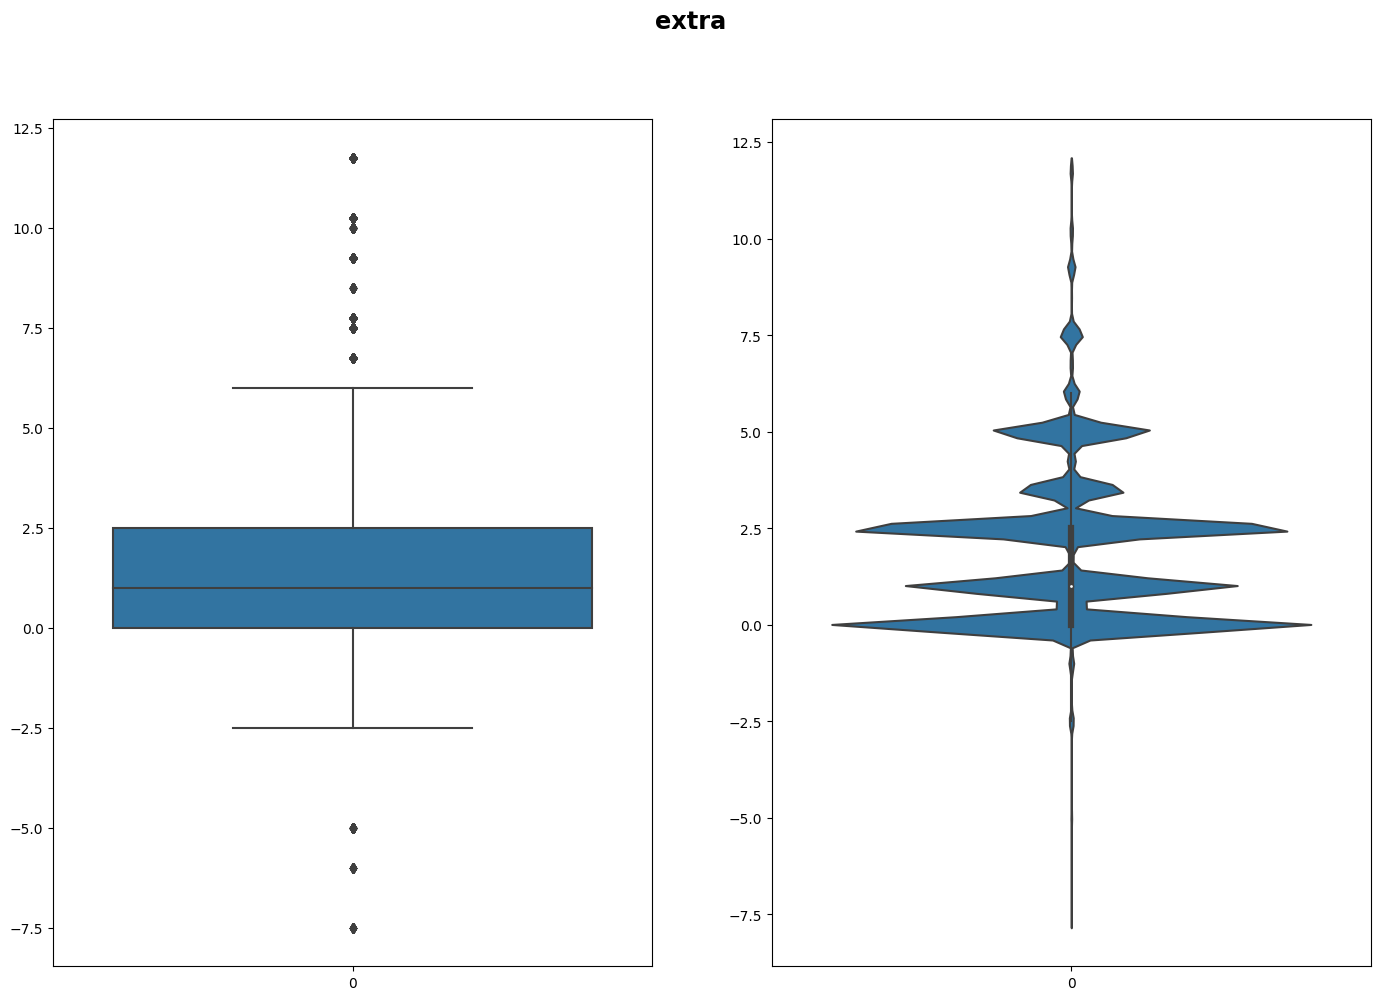

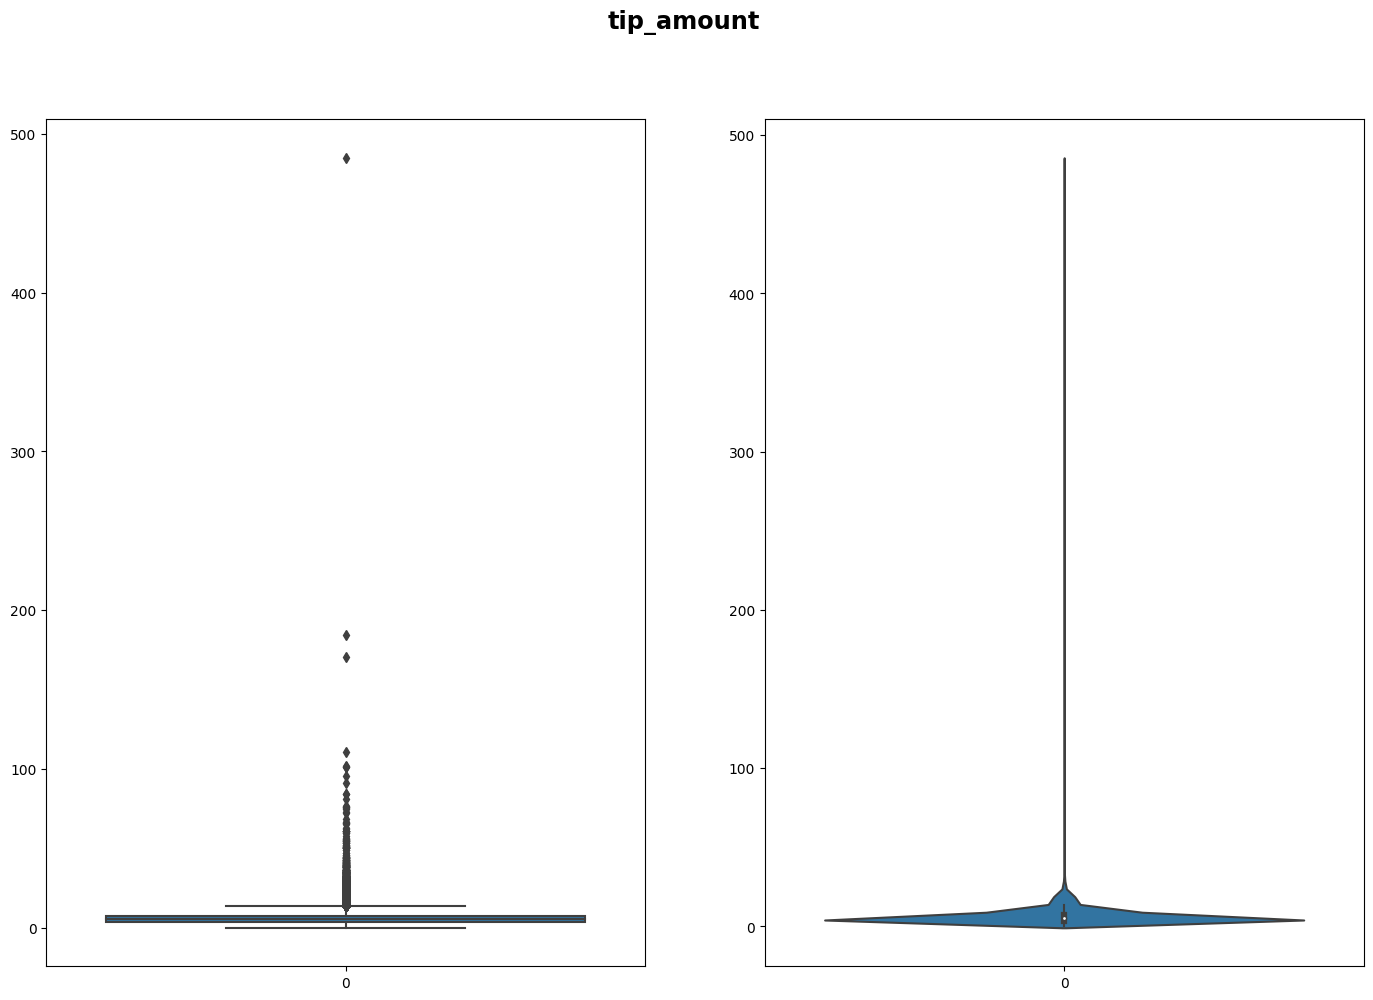

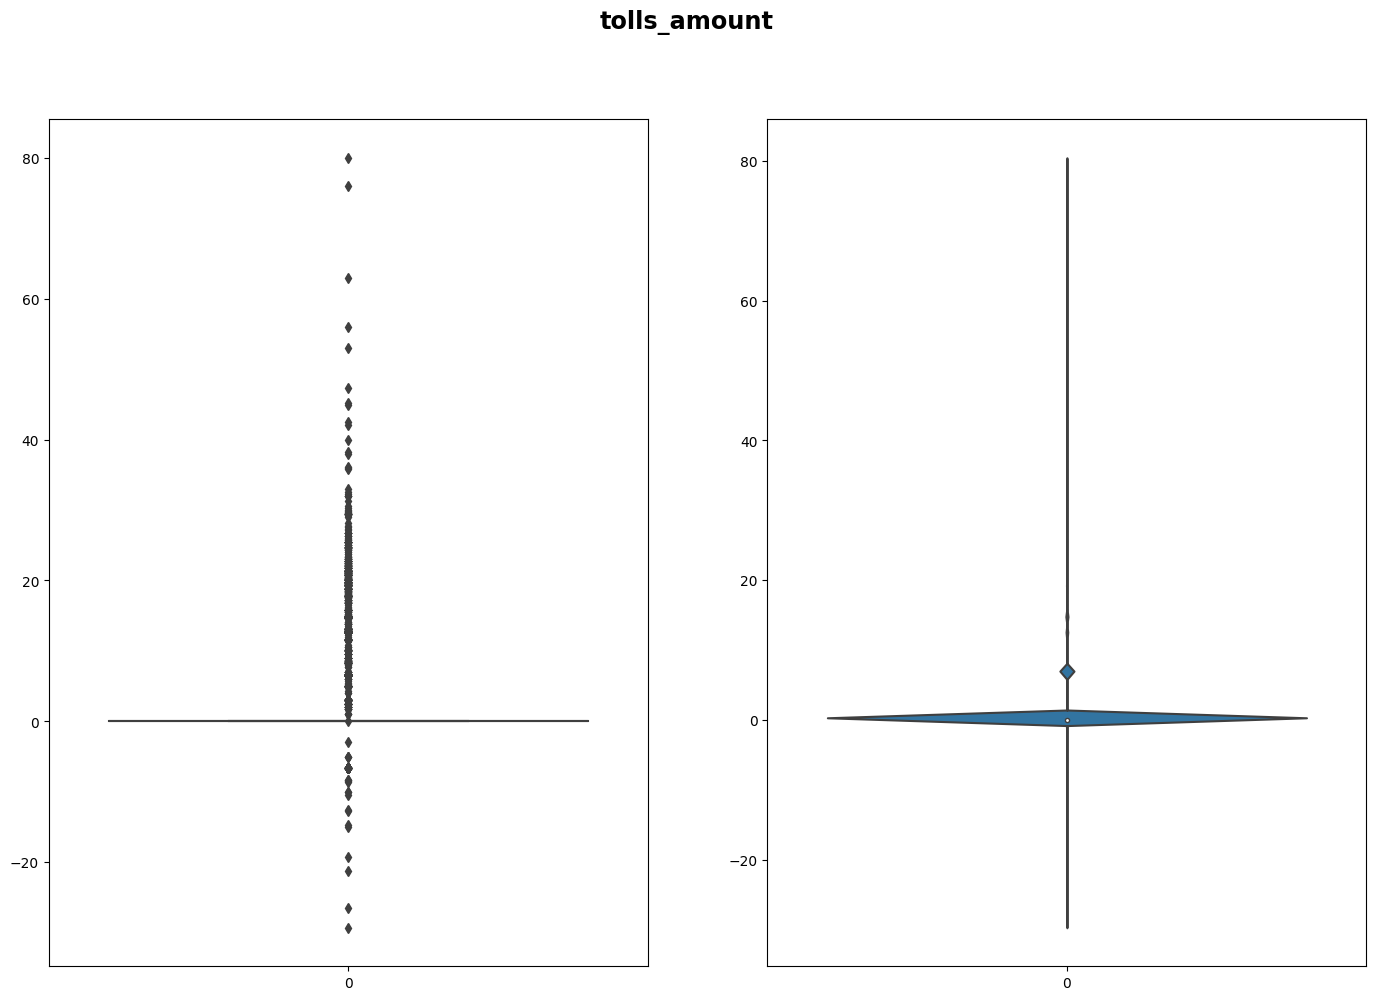

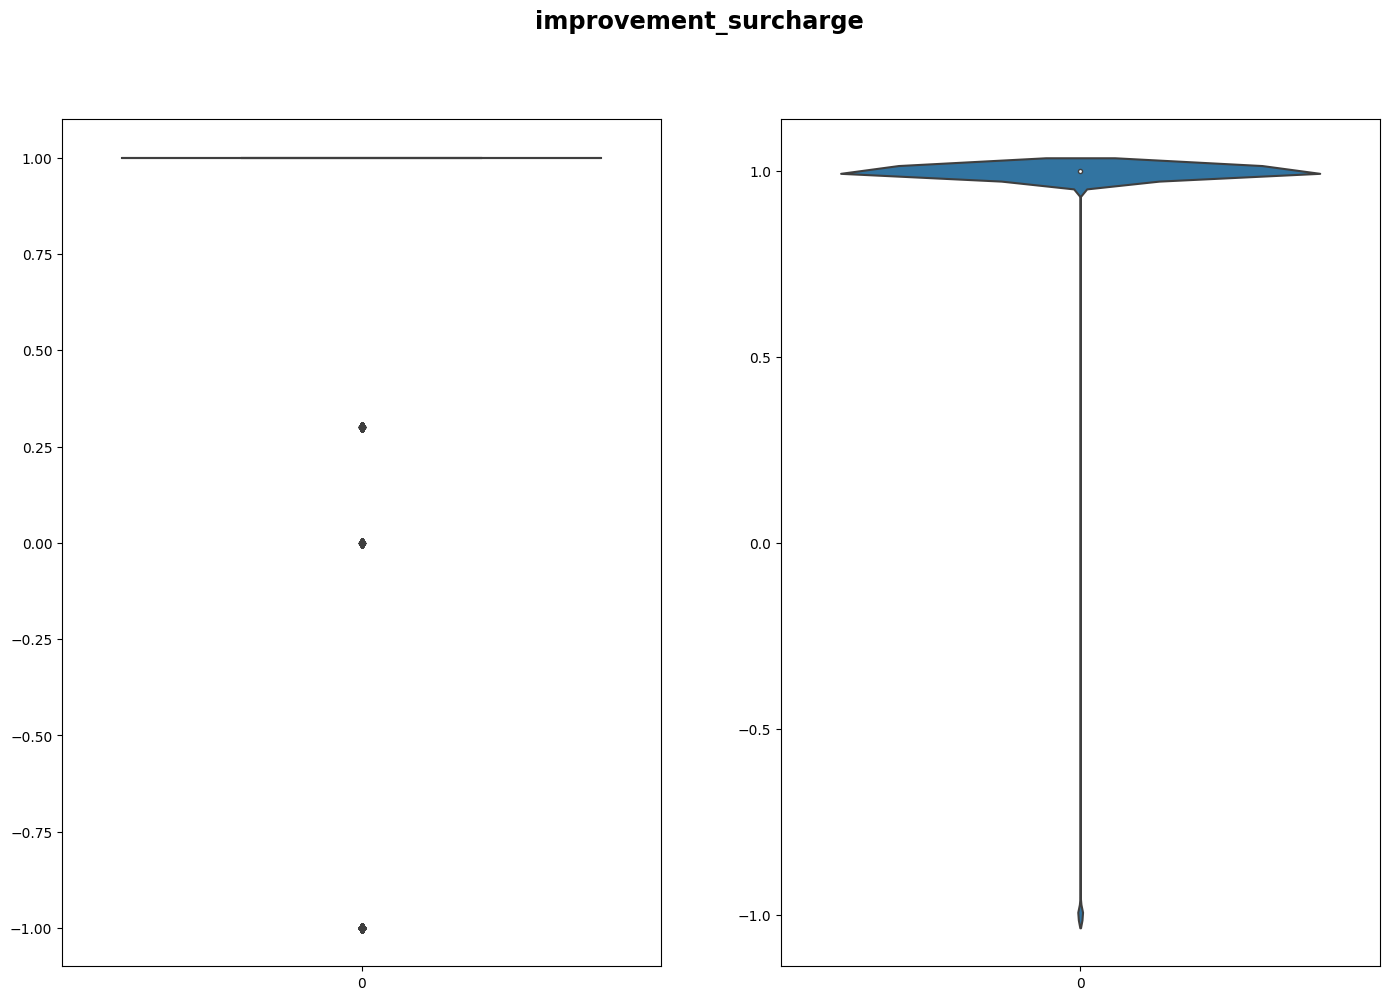

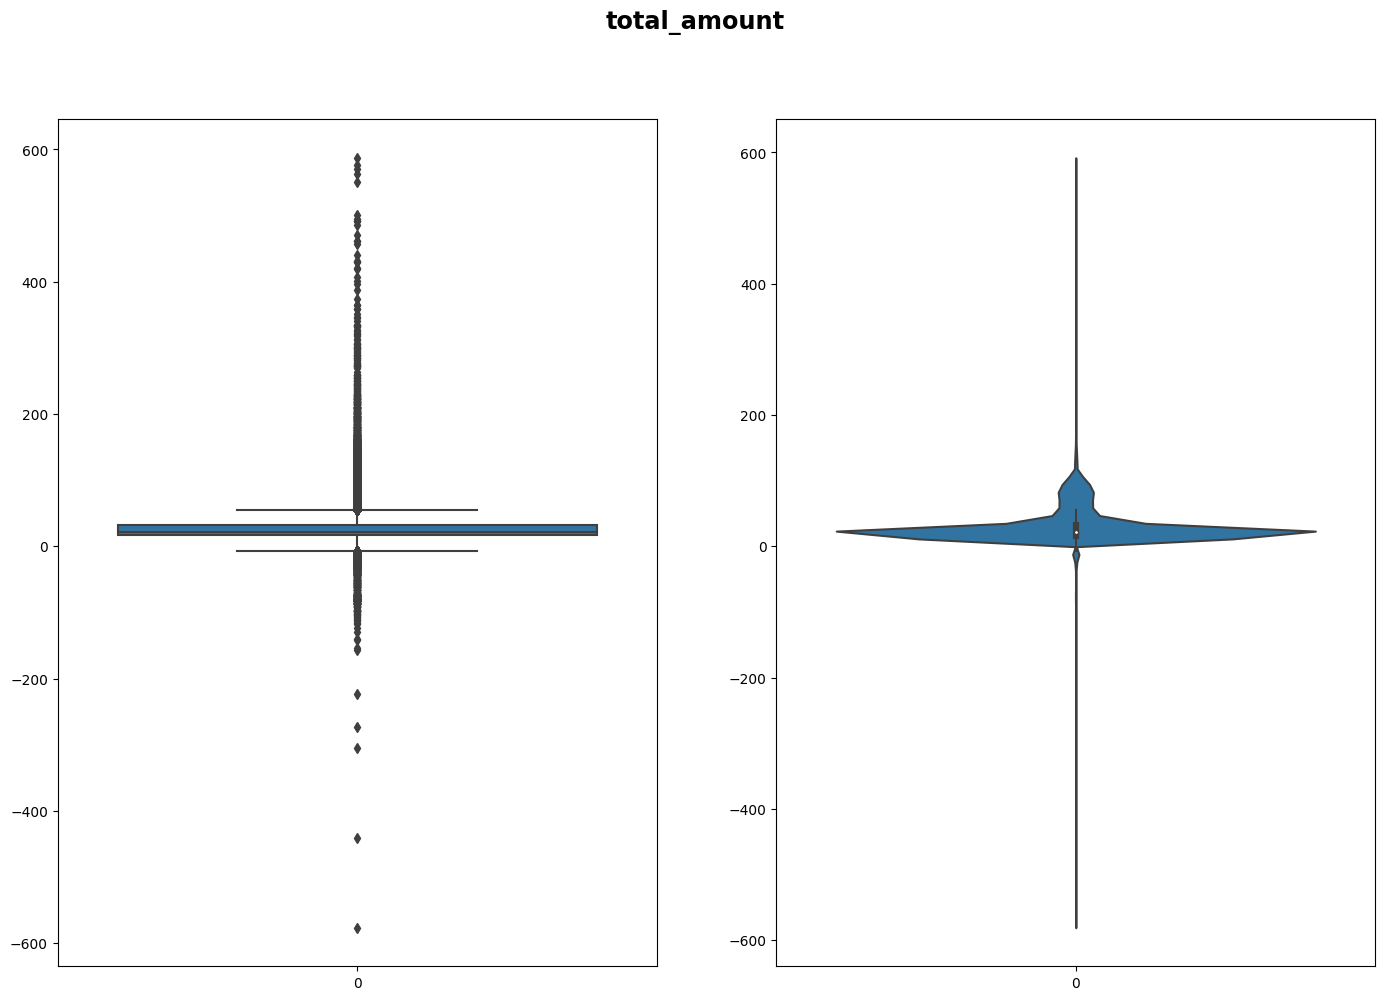

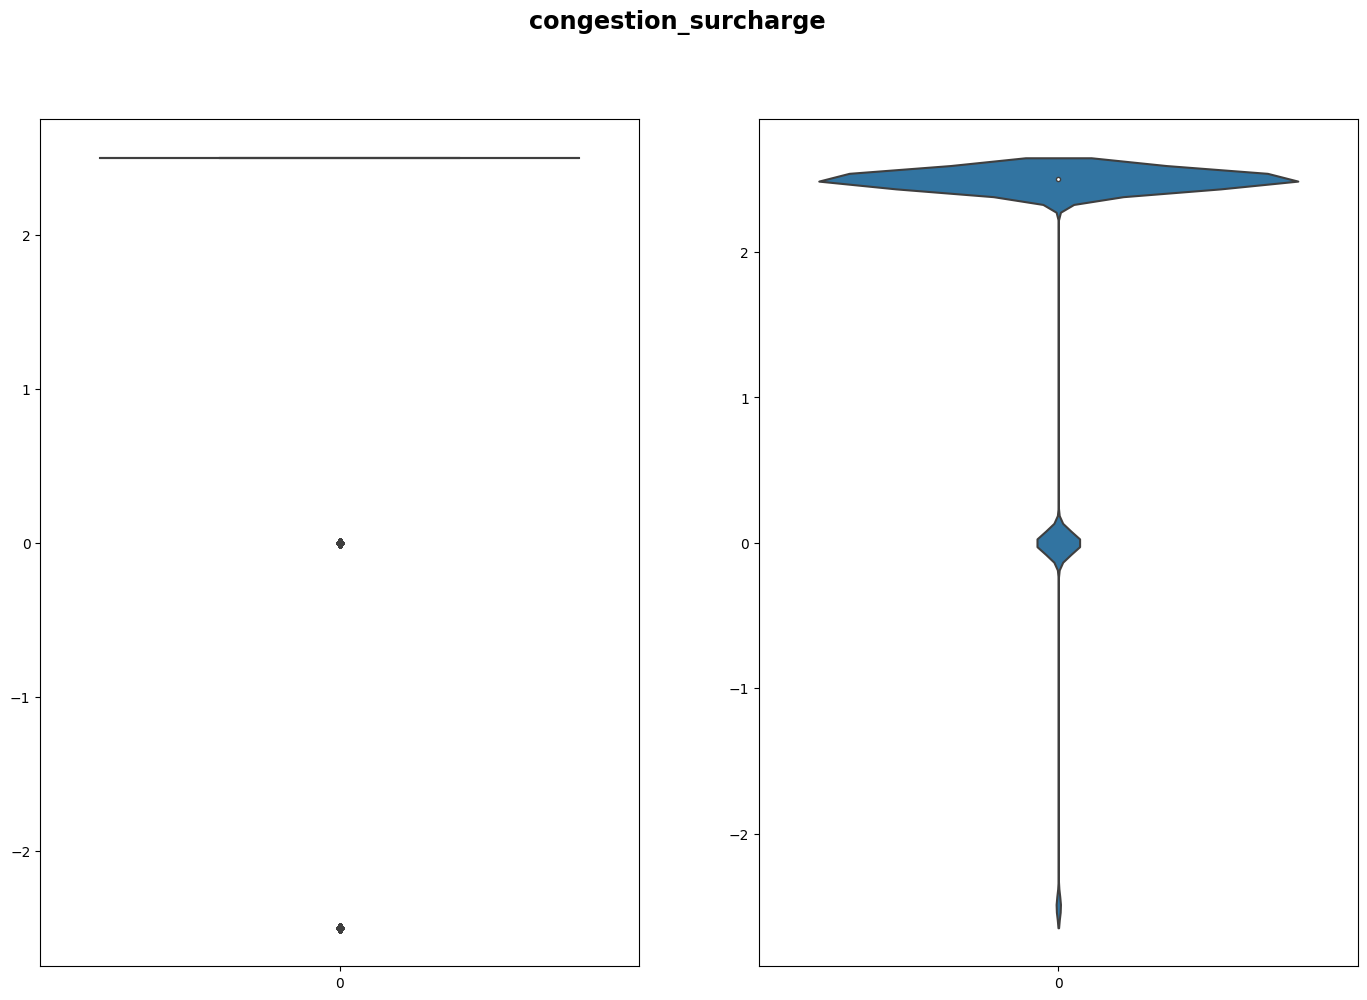

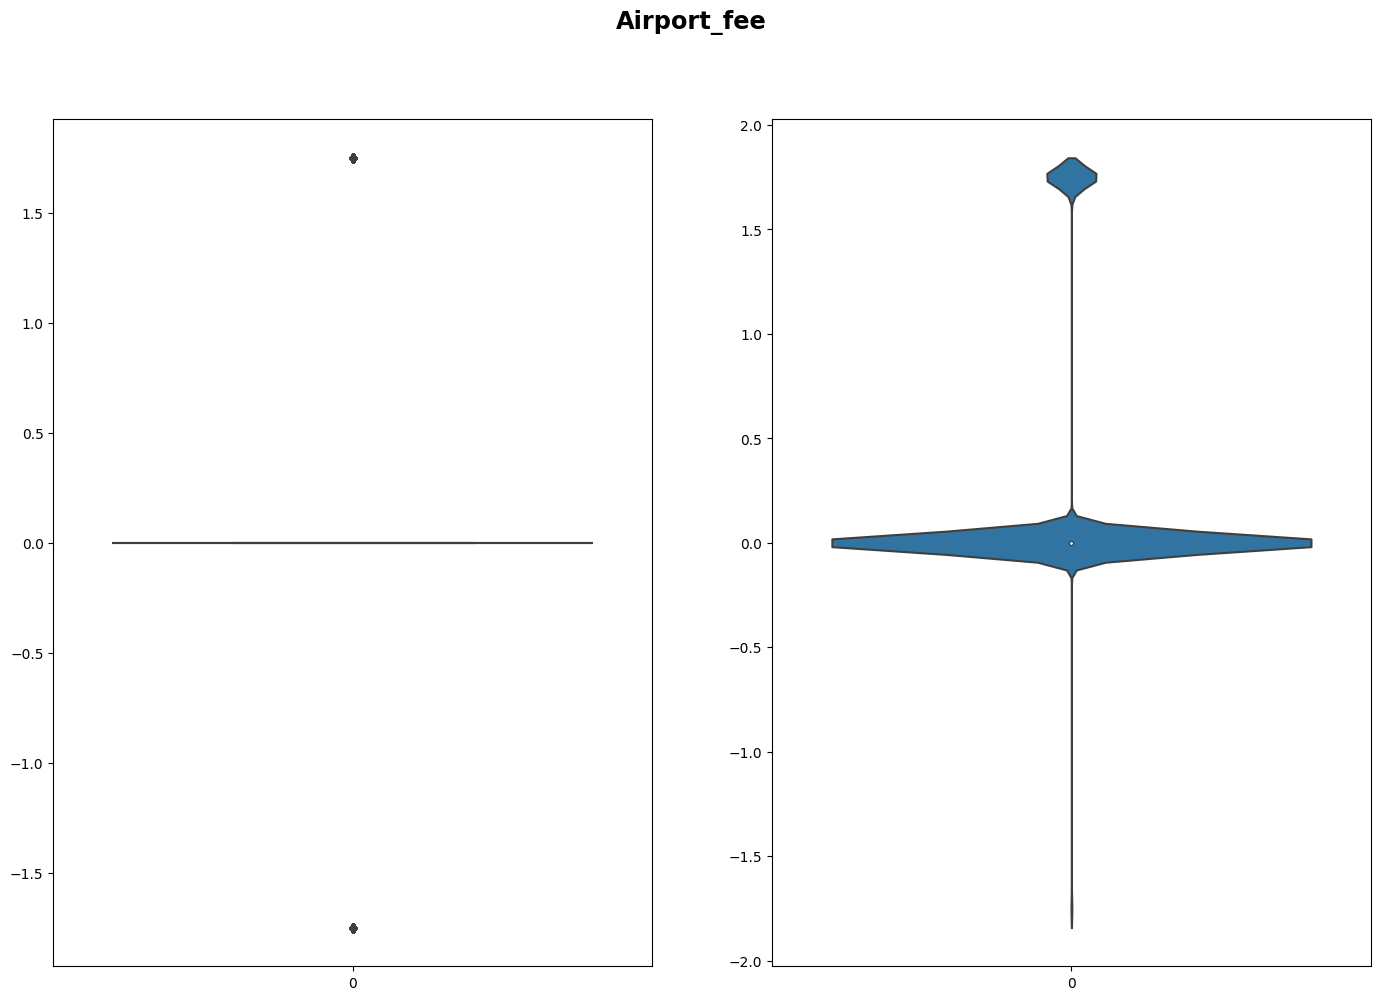

In [15]:
if not DEV_ENV:
    print_diagrams(data)

# Feature engineering, selection and preprocessing

In [16]:
'''
Imports
'''

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import VarianceThreshold, RFE, SequentialFeatureSelector
from sklearn.compose import ColumnTransformer

In [17]:
'''
Methods to preprocess and engineer features
'''

def standard_scaler(x, m, s, q1, q3, iqr):
    if x == np.nan:
        return np.nan
    
    if x > ((q3 + 1.5)*iqr):
        return ((x - m)/s)
    
    return x

def engineer_features(df, dropna=False, scale_outliers=False, make_abs=False):
    # Omit the features which don't contribute to the target variable
    droppable_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
    make_absolute_columns = ['extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']
    scale_down_outliers = ['trip_distance']
    
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
    # Copy the main DataFrame in a variable named 'data' after dropping columns
    data = df.drop(columns=droppable_columns, axis=1)
    
    # Convert numeric values to absolute value
    if make_abs:
        for col in make_absolute_columns:
            data[col] = abs(data[col])
    
    # Scale down upper outliers using standard scaling technique
    if scale_outliers:
        for col in scale_down_outliers:
            m = data[col].mean()
            s = data[col].std()

            q1 = data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            iqr = q3 - q1

            l = lambda x: standard_scaler(x, m, s, q1, q3, iqr)

            data[col] = data[col].apply(l)
        
    
    # remove if more than 3 values in a row are missing (conditional)
    if dropna:
        data.dropna(thresh=10, inplace=True)
    
    # Include the trip's duration in seconds
    data['trip_duration'] = abs((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds())
    
    # Replace "unknown" value with np.nan
    data['payment_type'].replace('unknown', np.nan, inplace=True)
    
    # Replace "0" value with np.nan
    data['passenger_count'].replace(0, np.nan, inplace=True)
    
    return data
    
def preprocess_data(df, return_X_y=False, as_df=False, make_y_abs=False, scaled=True):
    
    df = df.copy(deep=True)
    
    feature_names = df.columns
    target_feature = 'total_amount'
    
    has_target = (target_feature in feature_names)
    
    if has_target:
        if make_y_abs:
            df[target_feature] = abs(df[target_feature])
        labels = df.pop(target_feature)
    
    # Engineer and select features
    df = engineer_features(df)
    
    # Column indices 
    text_based_columns = ['payment_type', 'store_and_fwd_flag']
    ordinal_numerical_columns = []
    categorical_numerical_columns = []
    ignored_columns = []
    num_cols_array = ordinal_numerical_columns + categorical_numerical_columns + text_based_columns + ignored_columns
    numerical_columns_unscaled = [_ for _ in df.columns if _ not in (num_cols_array)]

    # Imputers
    imputer = SimpleImputer()
    knn_imputer = KNNImputer(n_neighbors=3)
    freq_imputer = SimpleImputer(strategy="most_frequent")
    
    # Encoders
    encoder = OneHotEncoder()
    ord_encoder = OrdinalEncoder()
    
    # Scalers
    scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()
    robust_scaler = RobustScaler()
    maxabs_scaler = MaxAbsScaler()
    
    # Pipeline steps
    text_cat_pipe_steps = [
        ('imputer', freq_imputer),
        ('encoder', encoder),
    ]
    
    num_cat_pipe_steps = [
        ('imputer', freq_imputer),
        ('encoder', encoder),
    ]
    
    ord_pipe_steps = [
        ('imputer', freq_imputer),
        ('encoder', ord_encoder),
    ]
    
    num_pipe_steps = [
        ('imputer', imputer),
    ]
    
    if scaled:
        num_pipe_steps.append(('scaler', minmax_scaler))
    
    # Pipelines
    text_cat_pipe = Pipeline(steps=text_cat_pipe_steps)
    
    num_cat_pipe = Pipeline(steps=num_cat_pipe_steps)
    
    ord_pipe = Pipeline(steps=ord_pipe_steps)
    
    num_pipe = Pipeline(steps=num_pipe_steps)
    
    # Transformers
    transformers = [
        ('categorical_pipeline', num_cat_pipe, categorical_numerical_columns),
        ('ordinal_pipeline', ord_pipe, ordinal_numerical_columns),
        ('numerical_pipeline', num_pipe, numerical_columns_unscaled),
        ('text_pipeline', text_cat_pipe, text_based_columns),
        ('ignored', freq_imputer, ignored_columns)
    ]
    
    ct = ColumnTransformer(transformers=transformers, remainder="passthrough", sparse_threshold=0)
    
    training_data = engineer_features(data.drop([target_feature], axis=1))
    ct.fit(training_data)
    transformed_df = ct.transform(df)
    
    
    if (as_df and has_target and return_X_y):
        new_column_names = ct.get_feature_names_out()
        new_df = pd.DataFrame(transformed_df, columns=new_column_names)
        
        return (
            new_df,
            labels
        )
    
    if has_target and return_X_y:
        return (
            transformed_df, 
            labels
        )
    
    if as_df:
        new_column_names = ct.get_feature_names_out()
        new_df = pd.DataFrame(transformed_df, columns=new_column_names)
        
        if has_target:
            new_df = pd.concat([new_df, labels], axis=1)
    
        return new_df
    
    return (transformed_df)

def preprocess_split(d, scaled=True):
    '''
    Preprocess test data
    '''

    X, y = preprocess_data(d, return_X_y=True, scaled=scaled)
    
    '''
    Splitting the data into training and test datasets
    '''

    return train_test_split(X, y, shuffle=False)


# Models

In [18]:
'''
Common imports
'''

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [19]:
'''
Score dictionary and utility functions
'''

scores = dict()
models = dict()

def add_model(name, score, model):
    scores[name] = score
    models[name] = model

def compute_scores(y_true, y_hat):
    y_scores = dict()
    
    y_scores['r2'] = r2_score(y_true, y_hat)
    y_scores['mae'] = mean_absolute_error(y_true, y_hat)
    
    return y_scores
    
    
def return_gridsearch(est=None, grid=dict(), cv=4):
    return GridSearchCV(est, param_grid=grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

def fit_predict_add(estimator, name, param_grid=dict(), isRejected=False, scaled=True):
    
    X_train, X_test, y_train, y_test = preprocess_split(data, scaled=scaled)
    
    if isRejected:
        return False
    
    model = return_gridsearch(est=estimator, grid=param_grid)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    
    score = dict()
    score['training'] = compute_scores(y_train, model.predict(X_train))
    score['validation'] = compute_scores(y_test, y_hat)

    add_model(name, score, model)

In [20]:
import json

def returnDataframe(d):
    
    models = []
    train_mae = []
    val_mae = []
    train_r2 = []
    val_r2 = []
    
    for model in d:
        models.append(model)
        train_mae.append(d[model]["training"]["mae"])
        val_mae.append(d[model]["validation"]["mae"])
        train_r2.append(d[model]["training"]["r2"])
        val_r2.append(d[model]["validation"]["r2"])
        
    df_dict = {
        "Training MAE": train_mae,
        "Validation MAE": val_mae,
        "Training R2": train_r2,
        "Validation R2": val_r2,
    }
    
    dataframe = pd.DataFrame(data=df_dict, index=models)
    
    return dataframe
    
def returnJSON(d):
    return json.dumps(d, sort_keys=True, indent=4)

In [21]:
'''
DummyRegressor

(dummy_reg)
'''

if False:
    from sklearn.dummy import DummyRegressor

    model = DummyRegressor(strategy="mean")
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)

    score = r2_score(y_test, y_hat)
    add_model('dummy_reg', score, model)
    
'''
Conclusion: The complexity of the data can't be computed using this model.

Result: REJECTED
'''

"\nConclusion: The complexity of the data can't be computed using this model.\n\nResult: REJECTED\n"

In [22]:
'''
Linear Regression

(linear_reg)
'''

from sklearn.linear_model import LinearRegression

params_grid = {
    'fit_intercept': [True, False]
}

estimator = LinearRegression()

fit_predict_add(
    estimator, 
    'linear_reg', 
    params_grid,
    True
)

'''
Conclusion: While the training and validation score is more or less acceptable, the test score was beyond the scale of comprehension. The model is not fit for this data.

Result: REJECTED
'''

'\nConclusion: While the training and validation score is more or less acceptable, the test score was beyond the scale of comprehension. The model is not fit for this data.\n\nResult: REJECTED\n'

In [23]:
'''
SGD Regressor

(sgd_reg)
'''

from sklearn.linear_model import SGDRegressor

estimator = SGDRegressor(max_iter=10000)

params_grid = {
    'loss': ['huber', 'epsilon_insensitive', 'squared_error'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['optimal', 'adaptive', 'constant'],
    'eta0': [0.01, 0.1],
}

fit_predict_add(
    estimator, 
    'sgd_reg', 
    params_grid,
    True
)

'''
Conclusion: In comparison with LinearRegression, it performed better on unseen data. Using GridSearchCV is expensive and not worth it, as the results are worse than the default model.

Result: REJECTED
'''

'\nConclusion: In comparison with LinearRegression, it performed better on unseen data. Using GridSearchCV is expensive and not worth it, as the results are worse than the default model.\n\nResult: REJECTED\n'

In [24]:
'''
SVR

(svr)
'''

from sklearn.svm import SVR

estimator = SVR()

params_grid = {
    
}

fit_predict_add(
    estimator, 
    'svr', 
    params_grid,
    True
)

'''
Conclusion: Support Vector Regressor is expensive, given that the documentation suggest that it is hard to scale SVR with samples over 10,000. It is not suitable for our use case as it has a lot more than 10k samples.

Result: REJECTED
'''

'\nConclusion: Support Vector Regressor is expensive, given that the documentation suggest that it is hard to scale SVR with samples over 10,000. It is not suitable for our use case as it has a lot more than 10k samples.\n\nResult: REJECTED\n'

In [25]:
'''
KNeighbors Regressor

(knn_reg)
'''

from sklearn.neighbors import KNeighborsRegressor

estimator = KNeighborsRegressor(n_jobs=-1)

params_grid = {
    'n_neighbors': list(range(5, 100, 5))
}

fit_predict_add(
    estimator, 
    'knn_reg', 
    params_grid,
    True,
    scaled=False
    
)

'''
Conclusion: Overfitting the data

Result: REJECTED
'''

'\nConclusion: Overfitting the data\n\nResult: REJECTED\n'

In [26]:
'''
GradientBoostingRegressor

(gb_reg)
'''

from sklearn.ensemble import GradientBoostingRegressor

estimator = GradientBoostingRegressor()

params_grid = {
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
}

fit_predict_add(
    estimator, 
    'gb_reg', 
    params_grid,
    True,
    scaled=False
)

'''
Result: REJECTED
'''

'\nResult: REJECTED\n'

In [27]:
'''
HistGradientBoostingRegressor

(hgb_reg)
'''

from sklearn.ensemble import HistGradientBoostingRegressor

estimator = HistGradientBoostingRegressor()

params_grid = {
    
}

fit_predict_add(
    estimator, 
    'hgb_reg', 
    params_grid,
    True,
#     scaled=False
)

'''
Conclusion: LGBM is a better estimator which uses a similar algorithm

Result: REJECTED
'''

'\nConclusion: LGBM is a better estimator which uses a similar algorithm\n\nResult: REJECTED\n'

In [28]:
'''
AdaBoostRegressor

(adab_reg)
'''

from sklearn.ensemble import AdaBoostRegressor

estimator = AdaBoostRegressor()

params_grid = {
    'n_estimators': [50, 100],
    'learning_rate' : [0.01, 0.05, 0.1, 0.5],
    'loss' : ['linear', 'square', 'exponential']
}

fit_predict_add(
    estimator, 
    'adab_reg', 
    params_grid,
    True,
    scaled=False
)
'''
Conclusion: XGBoost gives better results with better speed and efficiency.

Result: REJECTED
'''

'\nConclusion: XGBoost gives better results with better speed and efficiency.\n\nResult: REJECTED\n'

In [29]:
'''
Multi Layer Perceptron Regressor

(mlp_reg)
'''

from sklearn.neural_network import MLPRegressor

estimator = MLPRegressor(hidden_layer_sizes= (50, 50, 50), learning_rate ='constant')

params_grid = {
    
}

fit_predict_add(
    estimator, 
    'mlp_reg', 
    params_grid,
    True,
    scaled=False
)

'''
Test score: 0.71911

Conclusion: Better results were obtained by default ensemble methods.

Result: REJECTED
'''

'\nTest score: 0.71911\n\nConclusion: Better results were obtained by default ensemble methods.\n\nResult: REJECTED\n'

In [30]:
'''
DecisionTreeRegressor

(dt_reg)
'''

from sklearn.tree import DecisionTreeRegressor

estimator = DecisionTreeRegressor()

params_grid = {
    'max_depth': range(1, 20, 2)
}

fit_predict_add(
    estimator, 
    'dt_reg', 
    params_grid,
    True,
    scaled=False
)

'''
Conclusion: Better results after using meta ensemble method BaggingRegressor

Result: REJECTED
'''

'\nConclusion: Better results after using meta ensemble method BaggingRegressor\n\nResult: REJECTED\n'

In [31]:
'''
BaggingRegressor

(bag_reg)
'''

from sklearn.ensemble import BaggingRegressor

estimator = BaggingRegressor(n_jobs=-1)

params_grid = {
#     "n_estimators": [50,100,200],
#     "max_features":[1,2,4,6,8],
#     "max_samples": [0.5,0.1],
#     "bootstrap": [True, False],
#     "bootstrap_features": [True, False]
}

fit_predict_add(
    estimator, 
    'bag_reg', 
    params_grid,
#     True,
    scaled=False
)

'''
Test score: 0.93107

Result: Second best model on test data 
'''

'\nTest score: 0.93107\n\nResult: Second best model on test data \n'

In [32]:
'''
ExtraTreesRegressor

(et_reg)
'''

from sklearn.ensemble import ExtraTreesRegressor

estimator = ExtraTreesRegressor(n_jobs=-1)

params_grid = {
    
}

fit_predict_add(
    estimator, 
    'et_reg', 
    params_grid,
#     True,
    scaled=False
)

'''
Test score: 0.94304

Result: Best model so far
'''

'\nTest score: 0.94304\n\nResult: Best model so far\n'

In [33]:
'''
RandomForestRegressor

(rf_reg)
'''

from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(n_jobs=-1)

params_grid = {

}

fit_predict_add(
    estimator, 
    'rf_reg', 
    params_grid,
#     True,
    scaled=False
)

'''
Test score: 0.92252
'''

'\nTest score: 0.92252\n'

In [34]:
'''
XGBoost Regressor

(xgb_reg)
'''

from xgboost import XGBRegressor

estimator = XGBRegressor(n_jobs=-1)

params_grid = {
    
}

fit_predict_add(
    estimator, 
    'xgb_reg', 
    params_grid,
#     True,
    scaled=False
)

'''
Test score: 0.91876
'''

'\nTest score: 0.91876\n'

In [35]:
'''
LGBMRegressor

(lgbm_reg)
'''

from lightgbm import LGBMRegressor

estimator = LGBMRegressor(n_jobs=-1, subsample=0.8)

params_grid = {
#     'max_depth': [5, 7, 9, 11],
#     'learning_rate': [.01, .1, .5, 1, 5],
#     'boosting_type': ['gbdt', 'rf']
}

fit_predict_add(
    estimator, 
    'lgbm_reg', 
    params_grid,
#     True,
    scaled=False
)

'''
Test score: 0.91876
'''

'\nTest score: 0.91876\n'

In [36]:
'''
Print scores
'''

returnDataframe(scores).T

,bag_reg,et_reg,rf_reg,xgb_reg,lgbm_reg
Training MAE,1.157356,3.418226e-14,1.032025,2.416133,2.693818
Validation MAE,2.919554,2.781697e+00,2.783494,2.709825,2.814596
Training R2,0.988166,1.000000e+00,0.991879,0.976437,0.954281
Validation R2,0.940843,9.421234e-01,0.943118,0.946751,0.932807


---

In [37]:
'''
Loading test data
'''

test_data = pd.read_csv(test_csv)

In [38]:
'''
Preprocess test data
'''

X_test_data = preprocess_data(test_data, scaled=False)

In [39]:
'''
Get the best model
'''

# scores_keys = list(scores.keys())
# scores_values = list(scores.values())
# best_score_value = max(scores_values)
# best_validation_model_name = scores_keys[scores_values.index(best_score_value)]


'\nGet the best model\n'

In [40]:
# best_validation_model_name

In [41]:
'''
Manually select a model
'''

manual_model_name = 'rf_reg'
select_model_manually = True

In [42]:
model = models[manual_model_name if select_model_manually else best_validation_model_name]

In [43]:
'''
Make the prediction on test data
'''

prediction = model.predict(X_test_data)

# Submission

In [44]:
'''
Create submission dataframe
'''

submission = pd.DataFrame(columns=['ID', 'total_amount'])

submission['ID'] = [__ for __ in range(1, len(prediction)+1)]
submission['total_amount'] = prediction

In [45]:
'''
Preview submission dataframe
'''

submission

,ID,total_amount
0,1,35.4885
1,2,26.1676
2,3,15.8906
3,4,14.3433
4,5,23.8273
...,...,...
49995,49996,15.5549
49996,49997,28.5005
49997,49998,21.2559
49998,49999,37.2871


In [46]:
'''
Exporting predictions as submission.csv
'''

submission.to_csv('submission.csv', index=False)